### Experiments exploration

In [16]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, Policy, Scenario)

from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

from ema_workbench import (Model, )

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time

from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

In [17]:
uncertainties = dike_model.uncertainties
levers = dike_model.levers 

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [18]:
base_case = Policy('Base Case', **{l.name:0 for l in dike_model.levers})

In [19]:
base_case

Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})

In [20]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=100)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 100 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [21]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,126.0,223.622426,1,0.871722,218.831042,1,0.705490,237.027027,10,0.852197,...,5.0,0.0,5.0,4.0,8.0,3.0,1.0,0,0,dikesnet
1,79.0,298.108524,1,0.100861,232.253542,1,0.104278,33.997448,1.5,0.316080,...,5.0,0.0,5.0,4.0,8.0,3.0,1.0,1,0,dikesnet
2,80.0,275.541284,10,0.200497,229.990714,1.5,0.055838,114.045936,1.5,0.031793,...,5.0,0.0,5.0,4.0,8.0,3.0,1.0,2,0,dikesnet
3,15.0,200.546816,1,0.000321,281.785818,1,0.018157,162.548088,1,0.153352,...,5.0,0.0,5.0,4.0,8.0,3.0,1.0,3,0,dikesnet
4,120.0,312.688358,1.5,0.202780,334.804942,1.5,0.047327,178.394116,1.5,0.513973,...,5.0,0.0,5.0,4.0,8.0,3.0,1.0,4,0,dikesnet


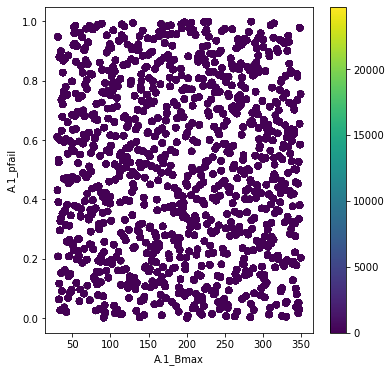

In [22]:
from ema_workbench.analysis import plotting, plotting_util

evac = outcomes['Expected Evacuation Costs 2']
maxEvac = evac

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.1_Bmax'], experiments['A.1_pfail'], c=maxEvac)
plt.colorbar(sc)
ax.set_xlabel('A.1_Bmax')
ax.set_ylabel('A.1_pfail')
plt.show()

In [23]:
experiments.to_csv('Experiments_from_Exploration_1000scenarios_100Policies_pf5.csv')

In [25]:
len(experiments)

100000

In [34]:
outcomes_DF = pd.DataFrame(outcomes)
outcomes_DF.to_csv('Outcomes_from_Exploration_1000scenarios_100Policies_pf5.csv')

In [35]:
outcomes_load_DF = pd.read_csv('Outcomes_from_Exploration_1000scenarios_100Policies_pf5.csv')
experiments_load_DF = pd.read_csv('Experiments_from_Exploration_1000scenarios_100Policies_pf5.csv')
#adjust to the ones needed
outcomes_of_interest = outcomes_load_DF.iloc[:,::]

In [36]:
pd.set_option('display.max_columns', None)
outcomes_of_interest.head()

,Unnamed: 0,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.5_Expected Annual Damage 0,A.5_Dike Investment Costs 0,A.5_Expected Number of Deaths 0,RfR Total Costs 0,Expected Evacuation Costs 0,A.1_Expected Annual Damage 1,A.1_Dike Investment Costs 1,A.1_Expected Number of Deaths 1,A.2_Expected Annual Damage 1,A.2_Dike Investment Costs 1,A.2_Expected Number of Deaths 1,A.3_Expected Annual Damage 1,A.3_Dike Investment Costs 1,A.3_Expected Number of Deaths 1,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.5_Expected Annual Damage 1,A.5_Dike Investment Costs 1,A.5_Expected Number of Deaths 1,RfR Total Costs 1,Expected Evacuation Costs 1,A.1_Expected Annual Damage 2,A.1_Dike Investment Costs 2,A.1_Expected Number of Deaths 2,A.2_Expected Annual Damage 2,A.2_Dike Investment Costs 2,A.2_Expected Number of Deaths 2,A.3_Expected Annual Damage 2,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,0,0.0,6.071731e+07,0.0,0.0,9.952540e+07,0.0,0.000000e+00,2.419803e+07,0.000000,0.0,1.106877e+07,0.0,1.018132e+06,3.337712e+07,0.000253,340700000.0,23.209601,0.0,7.427904e+07,0.0,0.0,7.466673e+07,0.0,0.0,4.123932e+07,0.0,0.0,0,0.0,0.0,5.543522e+07,0.0,377300000.0,0.0,0.0,1.019773e+08,0.0,0.0,0,0.0,0.0,5.876762e+07,0.0,0.0,1.309366e+07,0.0,0.0,4.542428e+07,0.0,679700000.0,0.0
1,1,0.0,6.071731e+07,0.0,0.0,9.952540e+07,0.0,3.036115e+06,2.419803e+07,0.001489,0.0,1.106877e+07,0.0,0.000000e+00,3.337712e+07,0.000000,340700000.0,48.414519,0.0,7.427904e+07,0.0,0.0,7.466673e+07,0.0,0.0,4.123932e+07,0.0,0.0,0,0.0,0.0,5.543522e+07,0.0,377300000.0,0.0,0.0,1.019773e+08,0.0,0.0,0,0.0,0.0,5.876762e+07,0.0,0.0,1.309366e+07,0.0,0.0,4.542428e+07,0.0,679700000.0,0.0
2,2,0.0,6.071731e+07,0.0,0.0,9.952540e+07,0.0,1.740958e+08,2.419803e+07,0.128044,0.0,1.106877e+07,0.0,0.000000e+00,3.337712e+07,0.000000,340700000.0,5057.037941,0.0,7.427904e+07,0.0,0.0,7.466673e+07,0.0,0.0,4.123932e+07,0.0,0.0,0,0.0,0.0,5.543522e+07,0.0,377300000.0,0.0,0.0,1.019773e+08,0.0,0.0,0,0.0,0.0,5.876762e+07,0.0,0.0,1.309366e+07,0.0,0.0,4.542428e+07,0.0,679700000.0,0.0
3,3,0.0,6.071731e+07,0.0,0.0,9.952540e+07,0.0,2.703954e+07,2.419803e+07,0.013140,0.0,1.106877e+07,0.0,0.000000e+00,3.337712e+07,0.000000,340700000.0,435.421645,0.0,7.427904e+07,0.0,0.0,7.466673e+07,0.0,0.0,4.123932e+07,0.0,0.0,0,0.0,0.0,5.543522e+07,0.0,377300000.0,0.0,0.0,1.019773e+08,0.0,0.0,0,0.0,0.0,5.876762e+07,0.0,0.0,1.309366e+07,0.0,0.0,4.542428e+07,0.0,679700000.0,0.0
4,4,0.0,6.071731e+07,0.0,0.0,9.952540e+07,0.0,0.000000e+00,2.419803e+07,0.000000,0.0,1.106877e+07,0.0,0.000000e+00,3.337712e+07,0.000000,340700000.0,0.000000,0.0,7.427904e+07,0.0,0.0,7.466673e+07,0.0,0.0,4.123932e+07,0.0,0.0,0,0.0,0.0,5.543522e+07,0.0,377300000.0,0.0,0.0,1.019773e+08,0.0,0.0,0,0.0,0.0,5.876762e+07,0.0,0.0,1.309366e+07,0.0,0.0,4.542428e+07,0.0,679700000.0,0.0


In [37]:
for n in range(1,6):
    outcomes_of_interest[f'A.{n}_Expected Annual Damage'] = 0
    outcomes_of_interest[f'A.{n}_Total Dike Investment Costs'] = 0
    outcomes_of_interest[f'A.{n}_Total Expected Number of Deaths'] = 0
    
    for i in range(3):
        outcomes_of_interest[f'A.{n}_Expected Annual Damage'] += outcomes_of_interest[f'A.{n}_Expected Annual Damage {i}']
        outcomes_of_interest[f'A.{n}_Total Dike Investment Costs'] += outcomes_of_interest[f'A.{n}_Dike Investment Costs {i}']
        outcomes_of_interest[f'A.{n}_Total Expected Number of Deaths'] += outcomes_of_interest[f'A.{n}_Expected Number of Deaths {i}']
    n+=1

outcomes_of_interest['RfR Total Costs'] = 0
outcomes_of_interest['Total Expected Evacuation Costs'] = 0
outcomes_of_interest['Other Areas Total Number of Deaths'] = 0  
outcomes_of_interest['Other Areas Total Dike Investment Costs'] = 0
outcomes_of_interest['Other Areas Total Damage'] = 0


for i in range(3):
    outcomes_of_interest['RfR Total Costs'] += outcomes_of_interest[f'RfR Total Costs {i}']
    outcomes_of_interest['Total Expected Evacuation Costs'] += outcomes_of_interest[f'Expected Evacuation Costs {i}']
    
for area in range(1,5):
    outcomes_of_interest['Other Areas Total Number of Deaths'] += outcomes_of_interest[f'A.{area}_Total Expected Number of Deaths']
    outcomes_of_interest['Other Areas Total Dike Investment Costs'] += outcomes_of_interest[f'A.{area}_Total Dike Investment Costs']
    outcomes_of_interest['Other Areas Total Damage'] += outcomes_of_interest[f'A.{area}_Expected Total Damage']
    
outcomes_totals = outcomes_of_interest.iloc[:,-17::]

KeyError: 'A.1_Expected Total Damage'

In [ ]:
outcomes_totals.head()

In [13]:
outcomes_totals.to_csv('Outcomes_totals_from_Exploration_1000scenarios_pf5.csv')

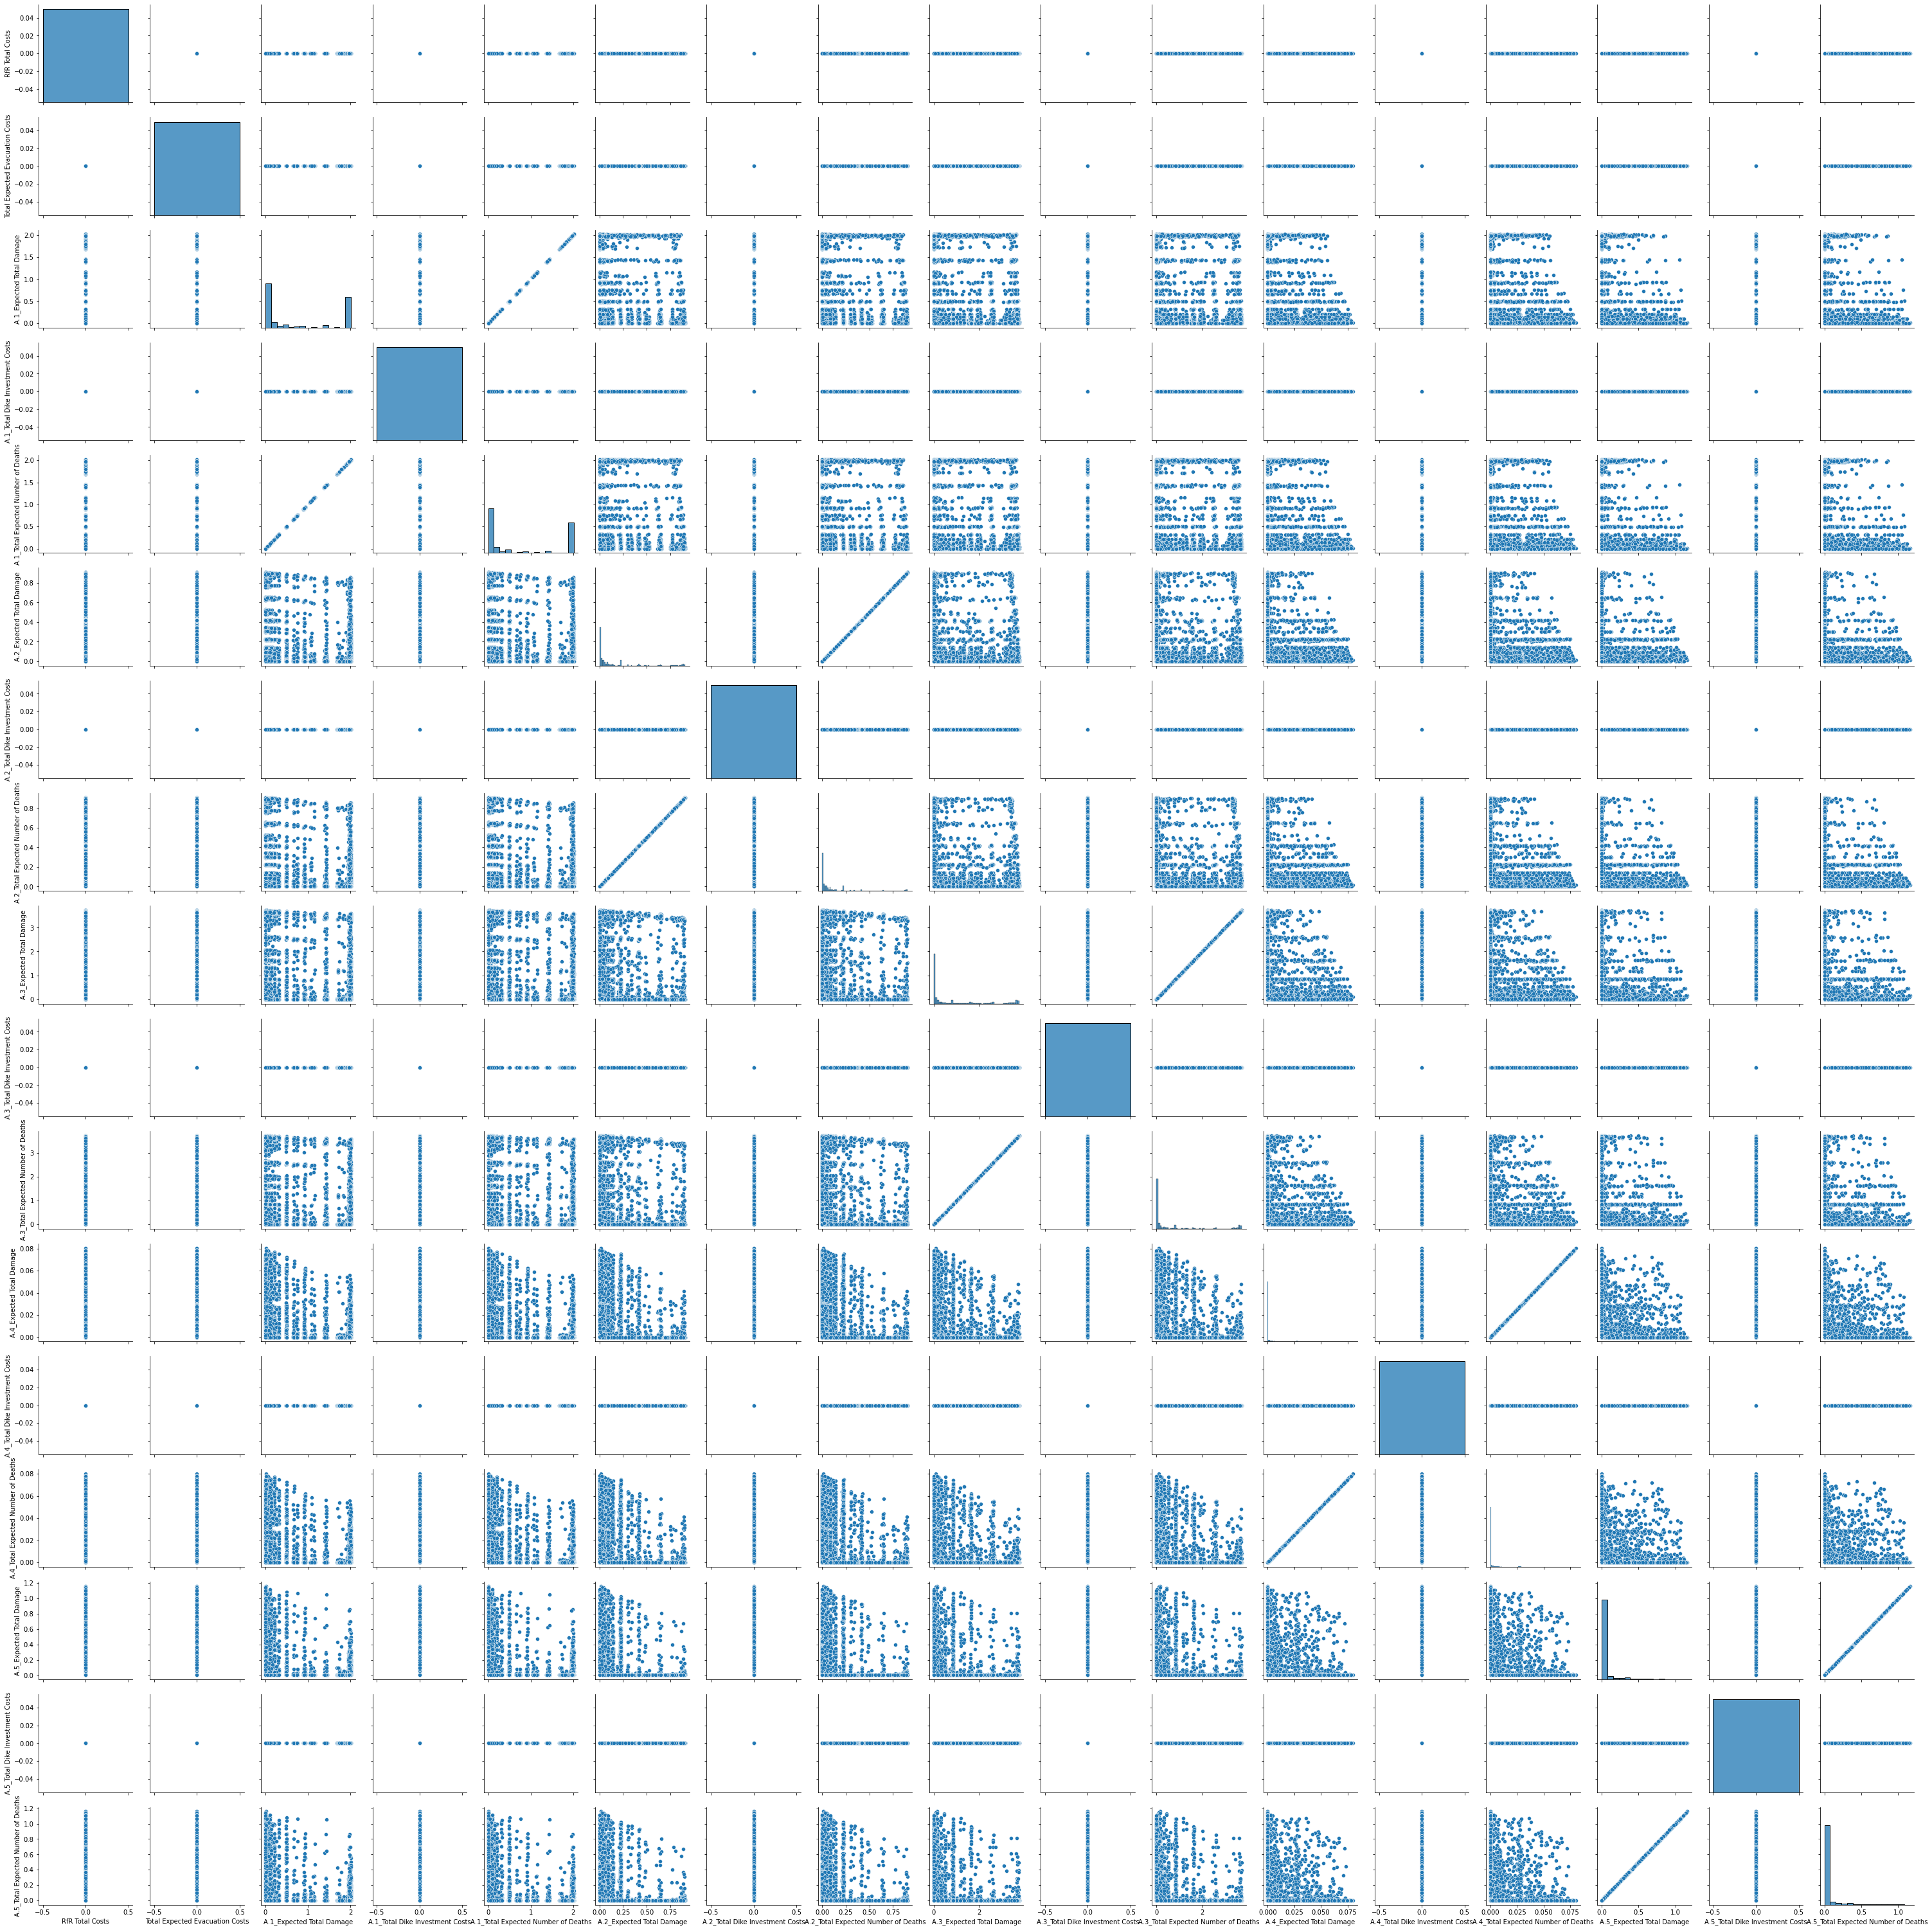

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_plot = sns.pairplot(outcomes_totals, vars=list(outcomes_totals.keys()))

In [15]:
pair_plot.savefig('pairplot.png')

In [16]:
from ema_workbench.analysis import feature_scoring

x = experiments_load_DF
y = outcomes_totals

fs = feature_scoring.get_feature_scores_all(x, y)

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

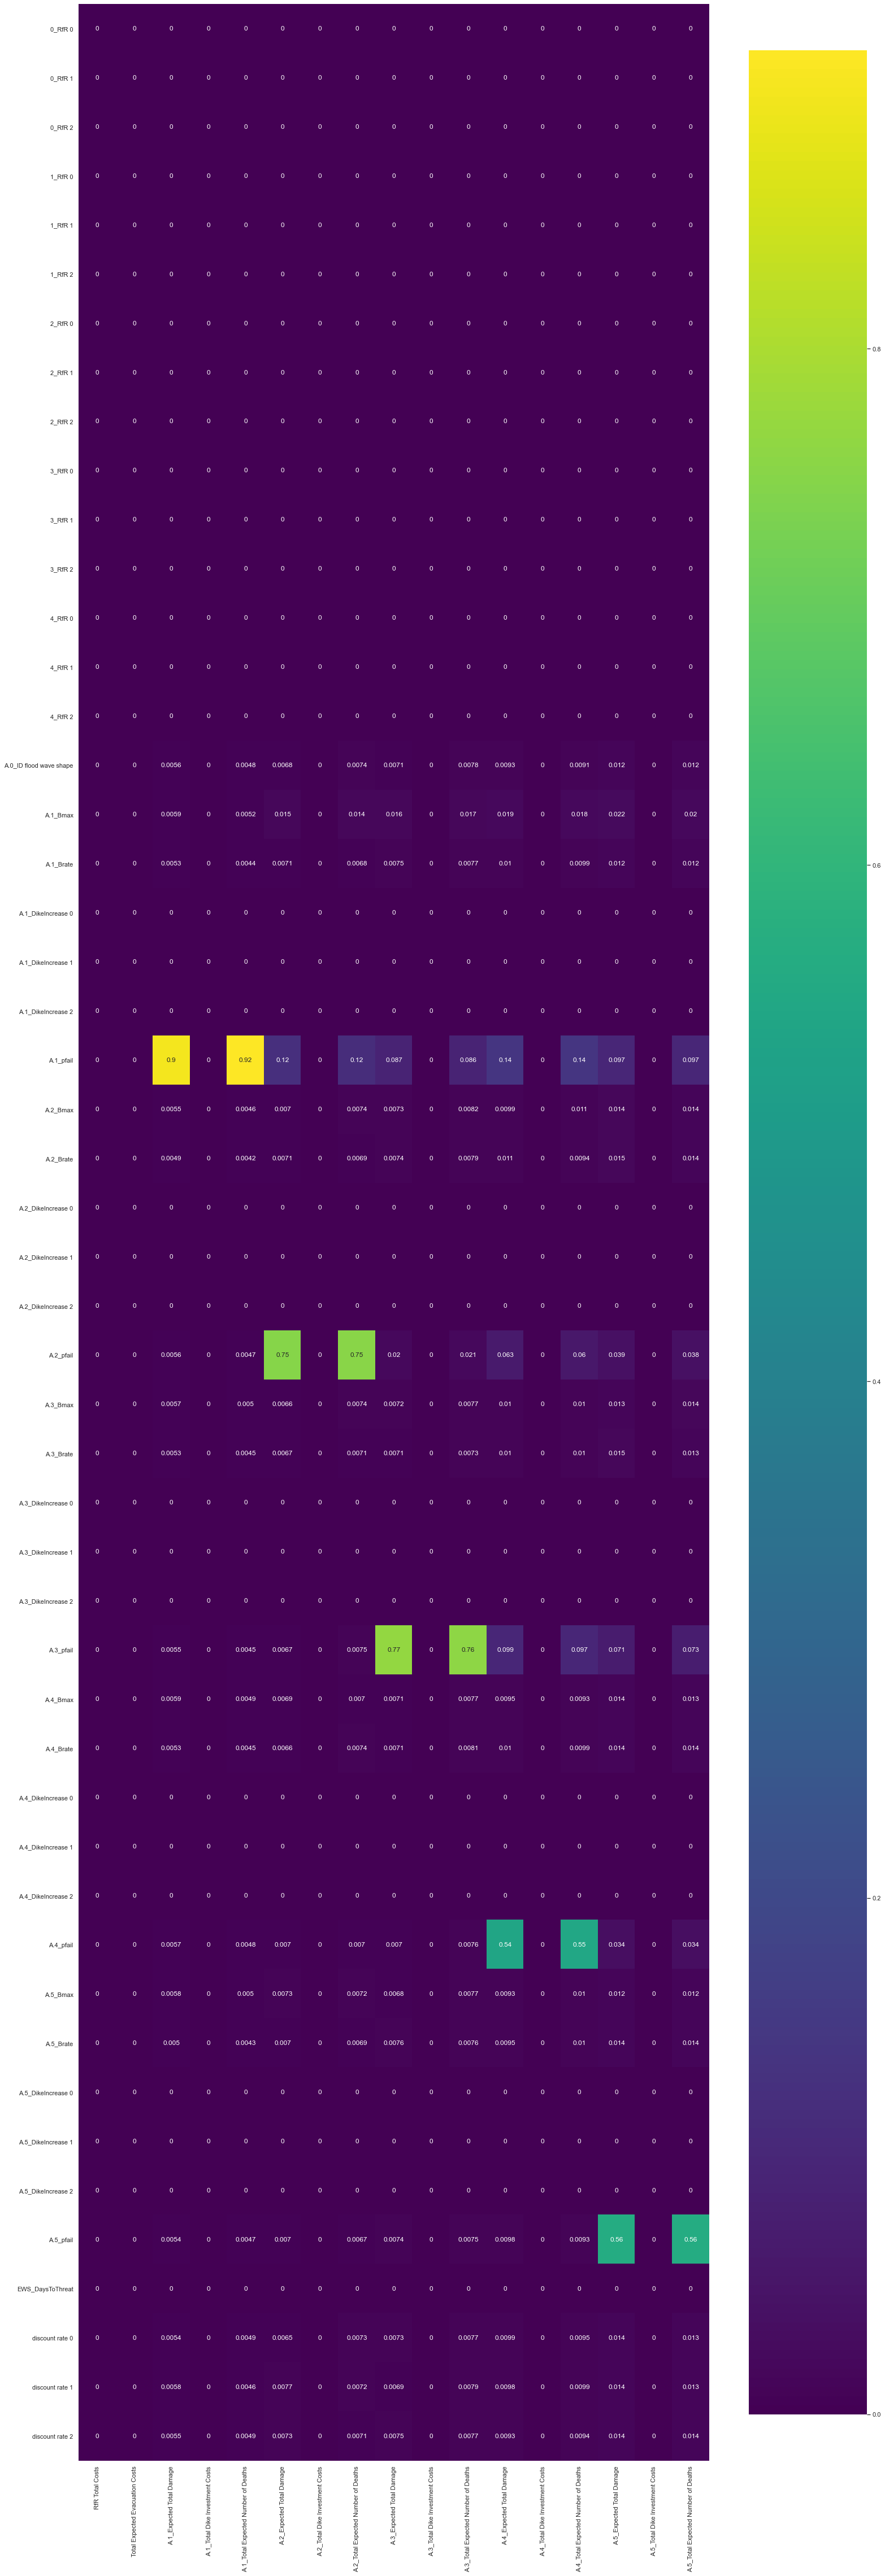

In [17]:
sns.set(rc = {'figure.figsize':(25,80)})
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()